In [2]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np
import seaborn as sbn
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from hc_lib.plots.container import PostResult

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def load(box, snap, axis, res, filename, dirname = 'fiducial'):
    base = '/lustre/cosinga/hcolor/output/'
    path = '%s%s_%sB_%03dS_%dA_%dR/results/'%(base, dirname, box, snap, axis, res)
    filepath = '%s%s_%sB_%03dS_%dA_%dR.pkl_rlib.pkl'%(path, filename, box, snap, axis, res)
    f = pkl.load(open(filepath, 'rb'))
    return f

In [4]:
box = 'tng100'
snap = [99, 67]
axis = 0
res = 800
files = ['hisubhaloXgalaxy', 'hiptlXgalaxy', 'vnXgalaxy']
flib_og = FigureLibrary()

for f in files:
    for s in snap:
        flib_og.addResults(load(box, s, axis, res, f))




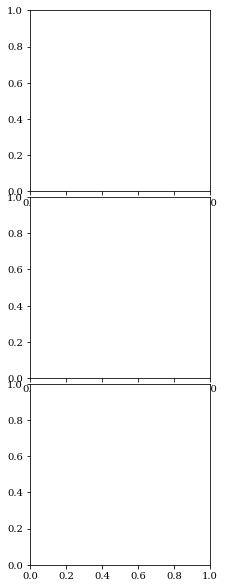

In [10]:
flib = copy.copy(flib_og)
flib.createFigGrid(3, 1, panel_length = 2.5)
fig, panels = flib.getFig()
dim = flib.getDim()
ip = {}
ip['is_particle'] = True
ip['color'] = ['red', 'blue']
ip['color_cut'] = '0.60'
ip['snapshot'] = 99
ip['gal_res'] = 'diemer'
ip['HI_res'] = 'diemer'
ip['species'] = 'stmass'
flib.arrangeResults(ip, 'space', ['real', 'redshift', ''], 'snapshot', [99], 'color');

In [11]:
labels = {'red':'HI-Red Cross-Power', 'blue':'HI-Blue Cross-Power'}
facecolors = ['gray', 'tan']
for idx in [(0,0),(1,0)]:
    for c in ['blue', 'red']:
        fkw = {}
        fkw['color'] = c
        fkw['label'] = labels[c]
        flib.plotFill(idx, {'color':c}, fill_kwargs = fkw)
    panels[idx].set_facecolor(mpl.colors.to_rgba(facecolors[idx[0]], 0.3))

In [12]:
for idx in [(0,0),(1,0)]:
    results = flib.figarr[idx]
    blues = flib.getMatchingResults({'color':'blue'}, {}, rcs = results)
    reds = flib.getMatchingResults({'color':'red'}, {}, rcs = results)
    flib.addColorRatios((2,0), reds, blues)
        
    

['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']


In [13]:
idx = (2,0)
ip = {}
ip['space'] = 'real'
fkw = {}
fkw['alpha'] = 0.55
fkw['color'] = 'gray'
fkw['label'] = 'Real Space'
flib.plotFill(idx, ip, fill_kwargs = fkw)
ip['space'] = 'redshift'
fkw['color'] = 'tan'
fkw['label'] = 'Redshift Space'
flib.plotFill(idx, ip, fill_kwargs = fkw)
p = panels[idx]
xlim = p.get_xlim()
p.plot(xlim, [1,1], linestyle = '--', color = 'black')

In [14]:
ratio_panel = [idx]
# axes
flib.xLimAdjustToNyquist(1)
flib.flushYAxisToData()
flib.logAxis('x')
flib.logAxis('y', panel_exceptions = ratio_panel)
flib.matchAxisLimits(panel_exceptions = ratio_panel)
p = panels[idx]
ylim = p.get_ylim()
p.set_ylim(ylim[0] - 0.2, ylim[1] + 0.2)
# ticks
tickkwargs = {'labelsize':12}
# flib.removeYTickLabels(panel_exceptions = ratio_panel + flib._defaultTickLabelPanelExceptions('y'))
# flib.removeXTickLabels()
flib.removeDefaultTickLabels()
flib.changeTickParams(tickkwargs)

#labels
lkw = {}
lkw['loc'] = 'upper right'
lkw['fontsize'] = 10
flib.addLegend((0,0), lkw)
flib.addLegend(idx, lkw)

txtkw = {'fontsize':12}
flib.rowLabels(['Real Space', 'Redshift Space', 'Color Ratio'], txt_kwargs = txtkw)
pos = [flib.xborder[0]/3/flib.figsize[0], 1 - (flib.panel_length + flib.panel_bt[0] + flib.yborder[1])/flib.figsize[1]]
txtkw['fontsize'] = 12
txtkw['rotation'] = 'horizontal'
txtkw['ha'] = 'center'
flib.axisLabel('x', txt_kwargs = txtkw)
txtkw['ha'] = 'center'
txtkw['va'] = 'center'
txtkw['rotation'] = 'vertical'
flib.axisLabel('y', subscript = r'\rm{HI-gal}', pos = pos, txt_kwargs = txtkw)
pos = [pos[0], (flib.panel_length/2 + flib.yborder[0])/flib.figsize[1]]
flib.axisLabel('y', r'P$_{\rm{red}}$ (k)/P$_{\rm{blue}}$ (k)', pos = pos, txt_kwargs = txtkw)


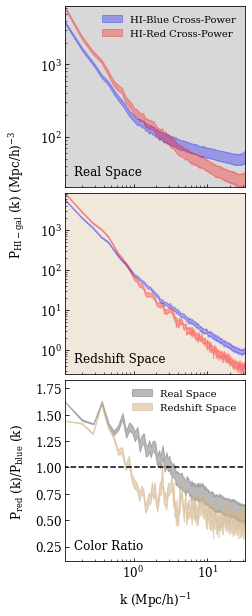

In [15]:
fig

In [16]:
fig.savefig('redvsblue99.pdf')

# Snapshot 67

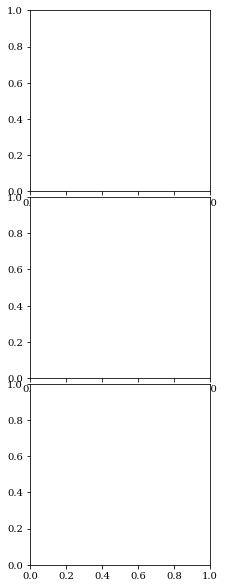

In [17]:
flib = copy.copy(flib_og)
flib.createFigGrid(3, 1, panel_length = 2.5)
fig, panels = flib.getFig()
dim = flib.getDim()
ip = {}
ip['is_particle'] = True
ip['color'] = ['red', 'blue']
ip['color_cut'] = '0.60'
ip['snapshot'] = 67
ip['gal_res'] = 'diemer'
ip['HI_res'] = 'diemer'
ip['species'] = 'stmass'
flib.arrangeResults(ip, 'space', ['real', 'redshift', ''], 'snapshot', [67], 'color');

In [18]:
labels = {'red':'HI-Red Cross-Power', 'blue':'HI-Blue Cross-Power'}
facecolors = ['gray', 'tan']
for idx in [(0,0),(1,0)]:
    for c in ['blue', 'red']:
        fkw = {}
        fkw['color'] = c
        fkw['label'] = labels[c]
        flib.plotFill(idx, {'color':c}, fill_kwargs = fkw)
    panels[idx].set_facecolor(mpl.colors.to_rgba(facecolors[idx[0]], 0.3))

In [19]:
for idx in [(0,0),(1,0)]:
    results = flib.figarr[idx]
    blues = flib.getMatchingResults({'color':'blue'}, {}, rcs = results)
    reds = flib.getMatchingResults({'color':'red'}, {}, rcs = results)
    flib.addColorRatios((2,0), reds, blues)
        
    

['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']


In [20]:
idx = (2,0)
ip = {}
ip['space'] = 'real'
fkw = {}
fkw['alpha'] = 0.55
fkw['color'] = 'gray'
fkw['label'] = 'Real Space'
flib.plotFill(idx, ip, fill_kwargs = fkw)
ip['space'] = 'redshift'
fkw['color'] = 'tan'
fkw['label'] = 'Redshift Space'
flib.plotFill(idx, ip, fill_kwargs = fkw)
p = panels[idx]
xlim = p.get_xlim()
p.plot(xlim, [1,1], linestyle = '--', color = 'black')

In [21]:
ratio_panel = [idx]
# axes
flib.xLimAdjustToNyquist(2)
flib.flushYAxisToData()
flib.logAxis('x')
flib.logAxis('y', panel_exceptions = ratio_panel)
flib.matchAxisLimits(panel_exceptions = ratio_panel)
p = panels[idx]
ylim = p.get_ylim()
p.set_ylim(ylim[0] - 0.2, ylim[1] + 0.2)
# ticks
tickkwargs = {'labelsize':12}
# flib.removeYTickLabels(panel_exceptions = ratio_panel + flib._defaultTickLabelPanelExceptions('y'))
# flib.removeXTickLabels()
flib.removeDefaultTickLabels()
flib.changeTickParams(tickkwargs)

#labels
lkw = {}
lkw['loc'] = 'upper right'
lkw['fontsize'] = 10
flib.addLegend((0,0), lkw)
flib.addLegend(idx, lkw)

txtkw = {'fontsize':12}
flib.rowLabels(['Real Space', 'Redshift Space', 'Color Ratio'], txt_kwargs = txtkw)
pos = [flib.xborder[0]/3/flib.figsize[0], 1 - (flib.panel_length + flib.panel_bt[0] + flib.yborder[1])/flib.figsize[1]]
txtkw['fontsize'] = 12
txtkw['rotation'] = 'horizontal'
txtkw['ha'] = 'center'
flib.axisLabel('x', txt_kwargs = txtkw)
txtkw['ha'] = 'center'
txtkw['va'] = 'center'
txtkw['rotation'] = 'vertical'
flib.axisLabel('y', subscript = r'\rm{HI-gal}', pos = pos, txt_kwargs = txtkw)
pos = [pos[0], (flib.panel_length/2 + flib.yborder[0])/flib.figsize[1]]
flib.axisLabel('y', r'P$_{\rm{red}}$ (k)/P$_{\rm{blue}}$ (k)', pos = pos, txt_kwargs = txtkw)


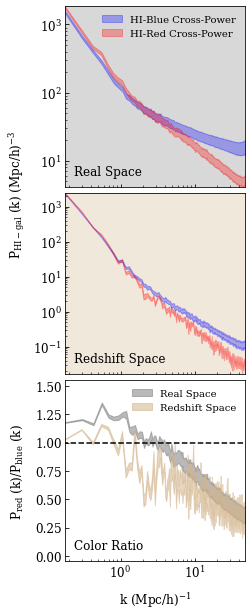

In [22]:
fig

In [23]:
fig.savefig('redvsblue67.pdf')

# Red, Blue, All Across Redshift

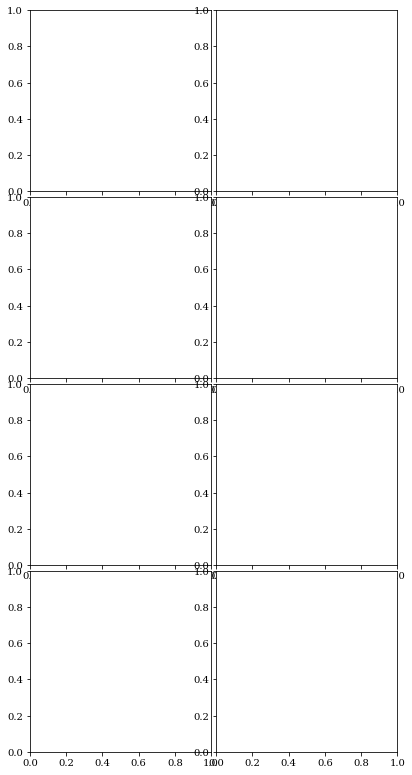

In [24]:
flib = copy.copy(flib_og)
flib.createFigGrid(4, 2, panel_length = 2.5)
fig, panels = flib.getFig()
dim = flib.getDim()
ip = {}
ip['is_particle'] = True
ip['color'] = ['red', 'blue', 'resolved']
ip['color_cut'] = ['0.60', 'None']
ip['snapshot'] = [99, 67]
ip['gal_res'] = 'diemer'
ip['HI_res'] = 'diemer'
ip['species'] = 'stmass'
flib.arrangeResults(ip, 'color', ['resolved', 'red', 'blue', ''], 'space', ['real', 'redshift'], 'redshift');

In [25]:
reds = flib.figarr[1,0]
blues = flib.figarr[2,0]
flib.addColorRatios((3,0), reds, blues)

reds = flib.figarr[1,1]
blues = flib.figarr[2,1]
flib.addColorRatios((3,1), reds, blues)

    

['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']


In [26]:
zs = flib.getPropVals('redshift')
ratio_panel = [(3,0), (3,1)]

print(zs)
sbncols = sbn.dark_palette('seagreen', len(zs))
coldict = {}
for z in range(len(zs)):
    coldict[zs[z][0]] = sbncols[z]
for i in range(dim[0]):
    for j in range(dim[1]):
        for z in zs:
            idx = (i, j)
            ip = {'redshift':z[0]}
            fkw = {}
            fkw['label'] = 'z=%.1f'%z[0]
            fkw['color'] = coldict[z[0]]
            fkw['alpha'] = 0.55
            flib.plotFill(idx, ip, fill_kwargs = fkw)
            if idx in ratio_panel:
                p = panels[idx]
                xlim = p.get_xlim()
                p.plot(xlim, [1,1], linestyle = '--', color = 'black')

[[2.220446049250313e-16, 2.220446049250313e-16], [0.5030475232448832, 0.5030475232448832]]


In [27]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.logAxis('x')
flib.logAxis('y', panel_exceptions = ratio_panel)
flib.matchAxisLimits()
# p = panels[idx]
# ylim = p.get_ylim()
# p.set_ylim(ylim[0] - 0.2, ylim[1] + 0.2)
# ticks
tickkwargs = {'labelsize':12}
# flib.removeYTickLabels(panel_exceptions = ratio_panel + flib._defaultTickLabelPanelExceptions('y'))
# flib.removeXTickLabels()
flib.removeDefaultTickLabels()
flib.changeTickParams(tickkwargs)

#labels
lkw = {}
lkw['loc'] = 'lower left'
lkw['fontsize'] = 10
flib.addLegend((0,1), lkw)
lkw['loc'] = 'upper right'
flib.addLegend((3,0), lkw)

txtkw = {'fontsize':12}
flib.rowLabels(['All Galaxies', 'Red Galaxies', 'Blue Galaxies', 'Color Ratio'], txt_kwargs = txtkw)
txtkw['ha'] = 'center'
txtkw['va'] = 'top'
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = txtkw)
pos = [flib.xborder[0]/3/flib.figsize[0], 1 - (flib.panel_length * 1.5 + flib.panel_bt[0] + flib.yborder[1])/flib.figsize[1]]
txtkw['fontsize'] = 12
txtkw['rotation'] = 'horizontal'
txtkw['ha'] = 'center'
txtkw['va'] = 'bottom'
flib.axisLabel('x', txt_kwargs = txtkw)
txtkw['ha'] = 'center'
txtkw['va'] = 'center'
txtkw['rotation'] = 'vertical'
flib.axisLabel('y', subscript = r'\rm{HI-gal}', pos = pos, txt_kwargs = txtkw)
pos = [pos[0], (flib.panel_length/2 + flib.yborder[0])/flib.figsize[1]]
flib.axisLabel('y', r'P$_{\rm{red}}$ (k)/P$_{\rm{blue}}$ (k)', pos = pos, txt_kwargs = txtkw)


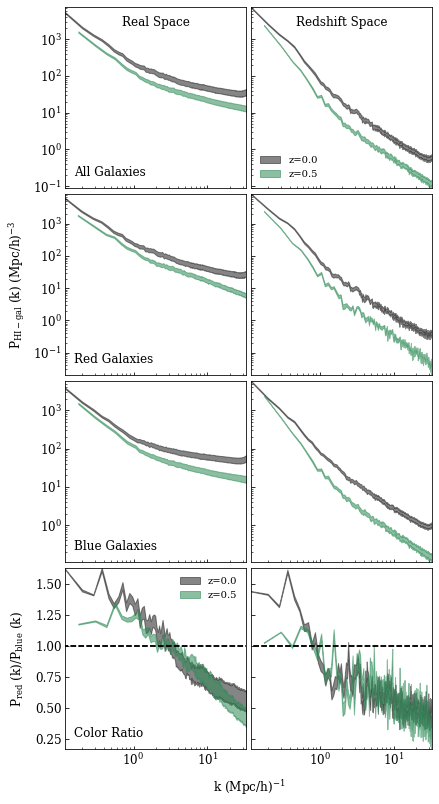

In [28]:
fig

In [29]:
fig.savefig('redshift_comparisons_colors_ratio_area.pdf')

['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['real', 'real']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
['redshift', 'redshift']
[[2.220446049250313e-16, 2.220446049250313e-16], [0.5030475232448832, 0.5030475232448832]]


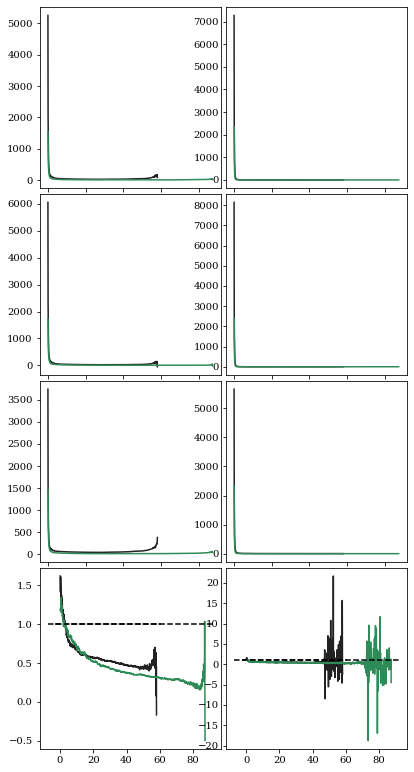

In [30]:
flib = copy.copy(flib_og)
flib.createFigGrid(4, 2, panel_length = 2.5)
fig, panels = flib.getFig()
dim = flib.getDim()
ip = {}
ip['is_particle'] = True
ip['color'] = ['red', 'blue', 'resolved']
ip['color_cut'] = ['0.60', 'None']
ip['snapshot'] = [99, 67]
ip['gal_res'] = 'diemer'
ip['HI_res'] = 'diemer'
ip['species'] = 'stmass'
flib.arrangeResults(ip, 'color', ['resolved', 'red', 'blue', ''], 'space', ['real', 'redshift'], 'redshift');
reds = flib.figarr[1,0]
blues = flib.figarr[2,0]
flib.addColorRatios((3,0), reds, blues)

reds = flib.figarr[1,1]
blues = flib.figarr[2,1]
flib.addColorRatios((3,1), reds, blues)

zs = flib.getPropVals('redshift')
ratio_panel = [(3,0), (3,1)]

print(zs)
sbncols = sbn.dark_palette('seagreen', len(zs))
coldict = {}
for z in range(len(zs)):
    coldict[zs[z][0]] = sbncols[z]
for i in range(dim[0]):
    for j in range(dim[1]):
        for z in zs:
            idx = (i, j)
            ip = {'redshift':z[0]}
            fkw = {}
            fkw['label'] = 'z=%.1f'%z[0]
            fkw['color'] = coldict[z[0]]
#             fkw['alpha'] = 0.55
            flib.plotMedian(idx, ip, line_kwargs = fkw)
            if idx in ratio_panel:
                p = panels[idx]
                xlim = p.get_xlim()
                p.plot(xlim, [1,1], linestyle = '--', color = 'black')

In [31]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.logAxis('x')
flib.logAxis('y', panel_exceptions = ratio_panel)
flib.matchAxisLimits()
# p = panels[idx]
# ylim = p.get_ylim()
# p.set_ylim(ylim[0] - 0.2, ylim[1] + 0.2)
# ticks
tickkwargs = {'labelsize':12}
# flib.removeYTickLabels(panel_exceptions = ratio_panel + flib._defaultTickLabelPanelExceptions('y'))
# flib.removeXTickLabels()
flib.removeDefaultTickLabels()
flib.changeTickParams(tickkwargs)

#labels
lkw = {}
lkw['loc'] = 'lower left'
lkw['fontsize'] = 10
flib.addLegend((0,1), lkw)
lkw['loc'] = 'upper right'
flib.addLegend((3,0), lkw)

txtkw = {'fontsize':12}
flib.rowLabels(['All Galaxies', 'Red Galaxies', 'Blue Galaxies', 'Color Ratio'], txt_kwargs = txtkw)
txtkw['ha'] = 'center'
txtkw['va'] = 'top'
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = txtkw)
pos = [flib.xborder[0]/3/flib.figsize[0], 1 - (flib.panel_length * 1.5 + flib.panel_bt[0] + flib.yborder[1])/flib.figsize[1]]
txtkw['fontsize'] = 12
txtkw['rotation'] = 'horizontal'
txtkw['ha'] = 'center'
txtkw['va'] = 'bottom'
flib.axisLabel('x', txt_kwargs = txtkw)
txtkw['ha'] = 'center'
txtkw['va'] = 'center'
txtkw['rotation'] = 'vertical'
flib.axisLabel('y', subscript = r'\rm{HI-gal}', pos = pos, txt_kwargs = txtkw)
pos = [pos[0], (flib.panel_length/2 + flib.yborder[0])/flib.figsize[1]]
flib.axisLabel('y', r'P$_{\rm{red}}$ (k)/P$_{\rm{blue}}$ (k)', pos = pos, txt_kwargs = txtkw)


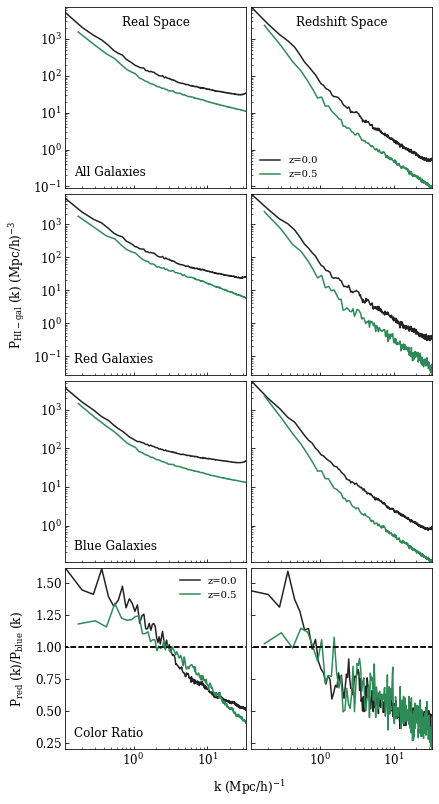

In [32]:
fig

In [ ]:
fig.savefig('redshift_comparisons_colors_ratio_median.pdf')